<a href="https://colab.research.google.com/github/ArtDeros/Metodo_Numerico/blob/main/G77_OscarAbella_Ej1(D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                     Tarea 3 - Cálculo y E.D.O Numéricas

                                 
                                 
                                 
                       Presentado por: Oscar Abella

                                   Grupo: 77

                               Código: 80208570



                       Presentado a: Juan Sebastian Rodriguez




                                
                   Universidad Nacional Abierta y a Distancia – UNAD
                              Ingernieria de sistemas
                                Metodos Numericos
                                 Noviembre de 2022

#Presentación del ejercicio en una celda markdown

la interpolación polinómica es una técnica de interpolación de un conjunto de datos o de una función por un polinomio. Es decir, dado cierto número de puntos obtenidos por muestreo o a partir de un experimento se pretende encontrar un polinomio que pase por todos los puntos.

Dados N+1 puntos x0, x1, ..., xN pertenecientes al intervalo [a,b], el polinomio de
interpolación de grado menor o igual que N que pasa por esos puntos es único. Recordemos brevemente que la forma eficiente de evaluar un polinomio P(x):

$$P(x) = a_nx^n + a_{n-1}x^{n-1} + ... + a_2x^2 + a_1x + a_0$$

los polinomios de interpolación, que se llamarán de Newton, se calculan mediante un esquema recursivo:

$$P(n) = P_{n-1}x + a_n(x-x_0)(x-x_1)(x-x_2)...(x-x_{n-1})$$

Se define la matriz de Vandermonde como la transpuesta de la anterior.
Este tipo de matrices aparece de manera natural cuando queremos ajustar m datos experimentales (αi, yi) a un polinomio en x de grado n − 1.

$$y = \sum_{k=0}^{n-1} c_kx^k = c_0 + c_1x + ... + c_{n-1}x^{n-1}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Tablas inciciales
x = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]
y = [0, 0.84147, 0.90930, 0.14112, -0.75680, -0.95892, -0.27942, 0.98936, 0.41212, -0.54402]
x_inter = 7

# Paso 2.1: Definir funcion de interpolacion de newton

In [ ]:
def newton(x, y, x_inter):
  n= len(x)

  dfd = [[None for x in range(n)] for x in range(n)]
  y_int = [None for x in range(n)]

  for i in range(n):
    dfd[i][0] = y[i]

  for j in range(1, n):
    for i in range(n - j):
      dfd[i][j] = (dfd[i + 1][j - 1] - dfd[i][j - 1]) / (x[i + j] - x[i])

  y_int[0] = dfd[0][0]
  xterm = 1

  for k in range(1, n):
    xterm = xterm * (x_inter - x[k - 1])
    y_inter = y_int[k - 1] + dfd[0][k] * xterm
    y_int[k] = y_inter

  return y_inter


# Paso 3.1: se llama la función para interpolar

In [ ]:
fxn = print("El valor de la interpolacion en 7 es: ",newton(x, y, x_inter))

El valor de la interpolacion en 7 es:  0.6622251666666655


#**Paso 2: encontrar el determinante de (A)**

In [ ]:
determ = np.linalg.det(A)
determ

1354948102747529.0

# Paso 4.1: Grafica del polinomio

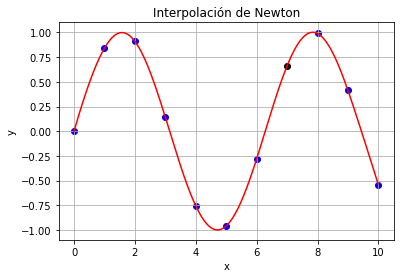

In [ ]:
x_i = np.arange(min(x), max(x), 0.01)
y_i = []

for i in range(len(x_i)):
  y_grafica = newton(x, y, x_i[i])
  y_i.append(y_grafica)

fxn = newton(x, y, x_inter)

plt.scatter(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación de Newton")
plt.grid(True)
plt.plot(x_i, y_i,'r')

plt.scatter(x_inter, fxn, color="black" )

plt.show()

#Paso 2.2: Definimos la interpolacion de lagrange

In [ ]:
def Lagrange(x, y, x_inter):

  n = len(x)
  suma = 0

  for i in range(n):
    producto = y[i]
    for j in range(n):
      if i != j:
        producto = producto * (x_inter -  x[j]) / (x[i] - x[j])
    suma = suma + producto

  y_inter = suma
  return y_inter


#Paso 3.2: Se llama la funcion

In [ ]:
fxl = print("El valor de la interpolacion por el metodo LAGRANGE en 7 es: ",Lagrange(x, y, x_inter))

El valor de la interpolacion por el metodo LAGRANGE en 7 es:  0.6622251666666668


# Paso 4.2: Grafica del polinomio

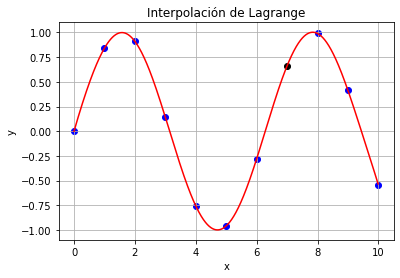

In [ ]:
x_v = np.arange(min(x), max(x), 0.01)
y_v = []

for i in range(len(x_v)):
  y_graficaL = Lagrange(x, y, x_v[i])
  y_v.append(y_graficaL)

fxl = Lagrange(x, y, x_inter)

plt.scatter(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación de Lagrange")
plt.grid(True)
plt.plot(x_v, y_v,'r')

plt.scatter(x_inter, fxl, color="black" )

plt.show()

*ANALISIS DE RESULTADOS**

con  los dos metodos de interpolacion podemos llegar a un resultado satisfactorio de la interpolacion, lo que los diferencia es la caltidad de pasos para llegar a dichos resultados, lo que hace que lagrange sea un mtodo mas efectivo a la hora de realizar dichos calculos


#**Referencias**

Nieves, A. (2015). Métodos numéricos: aplicados a la ingeniería. Grupo Editorial Patria. (pp. 627 – 632).

**Videos de apoyo:**

https://www.youtube.com/watch?v=yRK7FMiGNqg

https://www.youtube.com/watch?v=mOIojg1u_oA

**Demas referencias:**


Posada Restrepo, J. A. Arévalo Ovalle, D. & Posada Restrepo, J. A. (2017). Matemáticas para ingeniería: Métodos Numéricos con Python. Editorial Politécnico Grancolombiano. (pp. 67 – 82) https://elibro-net.bibliotecavirtual.unad.edu.co/es/ereader/unad/71002?page=67
Regresión lineal

Nieves, A. (2015). Métodos numéricos: aplicados a la ingeniería. Grupo Editorial Patria. (pp. 412 – 424). https://elibro-net.bibliotecavirtual.unad.edu.co/es/ereader/unad/39455?page=429
Posada Restrepo, J. A. Arévalo Ovalle, D. & Posada Restrepo, J. A. (2017). Matemáticas para ingeniería: Métodos Numéricos con Python. Editorial Politécnico Grancolombiano. (pp. 50 – 55) https://elibro-net.bibliotecavirtual.unad.edu.co/es/ereader/unad/71002?page=51
Venegas, H (2022). Ajuste de curvas. UNAD. [OVI] https://repository.unad.edu.co/handle/10596/49434
Interpolación
